In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Convert image to tensor
transform = transforms.ToTensor()

# Load training and test data
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)


In [3]:
class FashionANN(nn.Module):
    def __init__(self):
        super(FashionANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # input layer (784 → 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)     # output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten the 28x28 image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
model = FashionANN()


In [5]:
criterion = nn.CrossEntropyLoss()                   # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
loss_list = []
accuracy_list = []

for epoch in range(10):
    total_loss = 0
    correct = 0
    total = 0
    model.train()

    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    loss_list.append(total_loss)
    accuracy_list.append(acc)
    print(f"| Epoch: {epoch+1:2d} | Loss: {total_loss:.4f} | Accuracy: {acc*100:.2f}% |")



| Epoch:  1 | Loss: 513.7151 | Accuracy: 80.98% |
| Epoch:  2 | Loss: 376.0493 | Accuracy: 85.71% |
| Epoch:  3 | Loss: 339.3679 | Accuracy: 86.97% |
| Epoch:  4 | Loss: 313.5404 | Accuracy: 87.88% |
| Epoch:  5 | Loss: 295.7896 | Accuracy: 88.50% |
| Epoch:  6 | Loss: 280.9773 | Accuracy: 89.09% |
| Epoch:  7 | Loss: 270.2112 | Accuracy: 89.39% |
| Epoch:  8 | Loss: 258.9348 | Accuracy: 89.86% |
| Epoch:  9 | Loss: 249.9676 | Accuracy: 90.14% |
| Epoch: 10 | Loss: 241.8876 | Accuracy: 90.41% |


In [15]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy
test_acc = accuracy_score(all_labels, all_preds)
print(f" Test Accuracy: {test_acc:.2f}")

# Classification report
print("\n Classification Report (Per Class Metrics):")
print(classification_report(all_labels, all_preds))


 Test Accuracy: 0.88

 Classification Report (Per Class Metrics):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.76      0.83      0.79      1000
           3       0.83      0.94      0.88      1000
           4       0.88      0.67      0.76      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.70      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.95      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



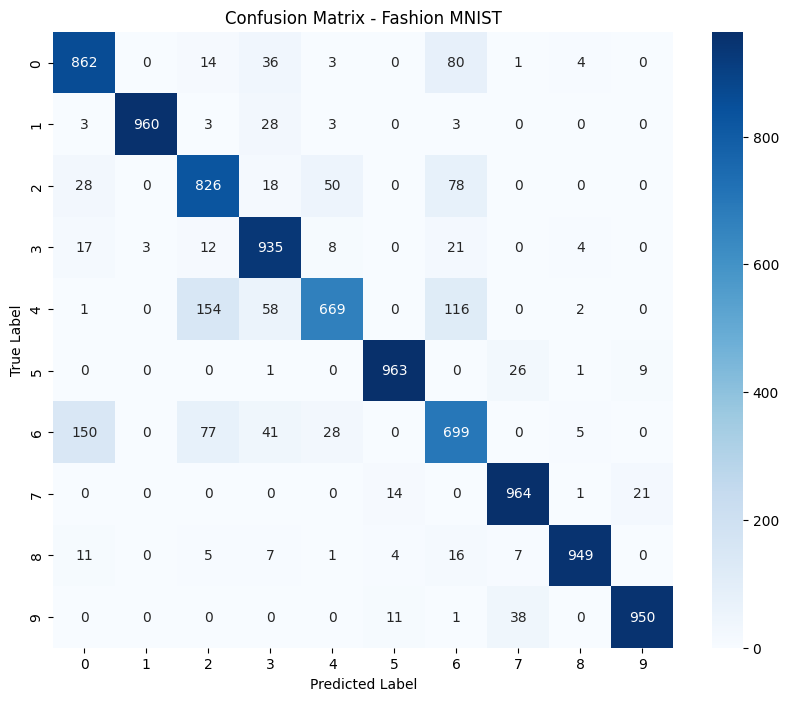

In [9]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fashion MNIST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


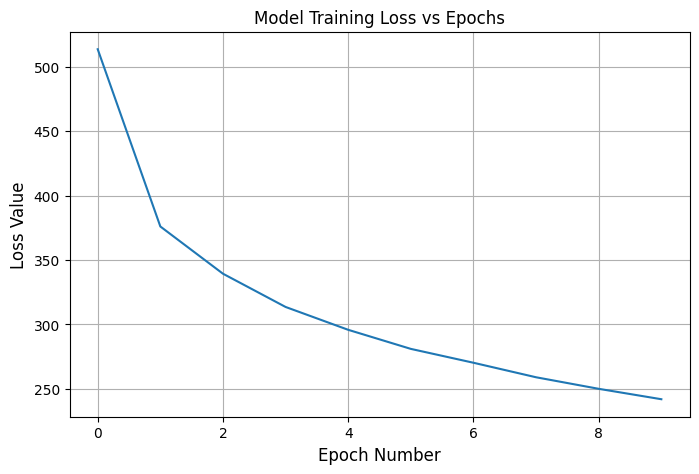

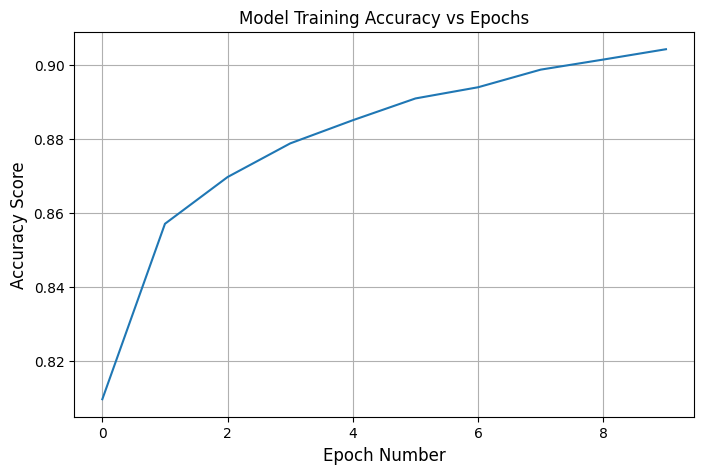

In [14]:
# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(loss_list, label='Training Loss')
plt.title("Model Training Loss vs Epochs")
plt.xlabel("Epoch Number", fontsize=12)
plt.ylabel("Loss Value", fontsize=12)
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(accuracy_list, label='Training Accuracy')
plt.title("Model Training Accuracy vs Epochs")
plt.xlabel("Epoch Number", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.grid(True)
plt.show()
